Illustration of the rolling ball algorithm using an exponential ball

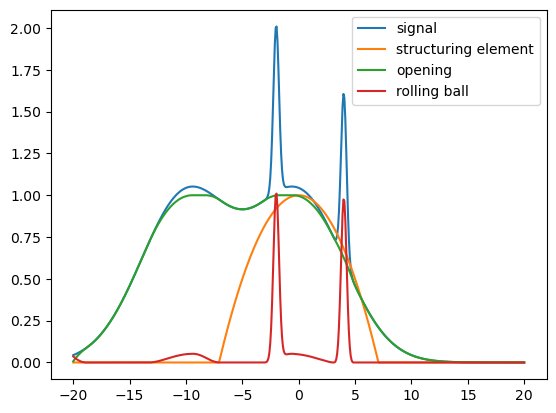

In [90]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-20,20,500)
y = np.exp(-0.5*((x)/4)**2)+np.exp(-0.5*((x+10)/4)**2) + np.exp(-0.5*((x+2)/0.25)**2) + np.exp(-0.5*((x-4)/0.25)**2)
b = np.roll(np.exp(-0.5*(x/4)**2), len(x)//2) 
b = np.maximum(0,1-0.02*x**2)

def conv(f,b):
    g = np.zeros_like(f)
    for i in range(len(f)):
        g[i] = (np.roll(f, -i) * b).sum()
    return g / b.sum()

def erode(f,b):
    g = np.zeros(f.shape)
    for i in range(len(f)):
        g[i] = (np.roll(f, -i-1) - b).min()
    return g + b.max()

def dilate(f,b):
    g = np.zeros(f.shape)
    for i in range(len(f)):
        g[i] = (f + np.roll(b, i)).max()
    return g - b.max()

plt.plot(x,y)
plt.plot(x,b)
plt.plot(x,dilate(erode(y,b),b))
plt.plot(x,y-dilate(erode(y,b),b))
# plt.axis('equal')
plt.legend(['signal','structuring element','opening','rolling ball'])


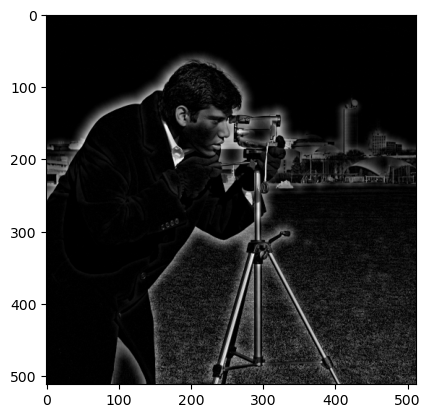

In [62]:
import scipy.ndimage as ndi
from skimage import data
img = data.camera().astype(float)
d = 1000*np.exp(-0.01*np.sum(np.stack(np.meshgrid(np.linspace(-5,5),np.linspace(-5,5)))**2,axis=0))
r = ndi.grey_opening(img,structure=d)
plt.imshow(img-r,cmap='gray')